# COMP1801 Tutorial Week 5 - Classification
*Dr Peter Soar - 2024/25 (based upon tutorials previously made by Dr Jing Wang in 22/23)*

This week we are changing over to the other branch of supervised learning by looking at Classification methods. The general pipeline of finding the best classification model is essentially identical to that of regression. The key differences to be aware of for classification is that there are a different selection of models to test and the evaluation of Classification tasks use different metrics.

For this tutorial, read through and try to understand the text and code examples I have provided (ask your tutor if you have any questions) and there will be a selection of exercises. Attempt these exercises on your own, but do ask your tutor for help if you get stuck.

$\newcommand{\Vec}[1]{\boldsymbol{#1}}$
$\newcommand{\Mat}[1]{\boldsymbol{#1}}$

##0. Do not forget to import all the Python Libraries being used!

In [1]:
# Import NumPy, which can deal with multi-dimensional arrays such as matrix intuitively.
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import seaborn as sns; sns.set()  # for plot styling
import sklearn.datasets # We want to be able to access the sklearn datasets again
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score # required for evaluating classification models
from sklearn.preprocessing import StandardScaler # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us

#1. Classification models
I'm going to start by introducing you to a selection of different classification models that I feel you should be aware of. This is far from an exhaustive list of all classifiers out there, and do feel free to look through the [sklearn documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) and explore the other models available.

Which of these models you try to implement with the coursework is up to you - there may be some you feel are more appropriate to the problem so you focus on them, or you might decide to experiment with all of them. There is no definitive right or wrong model to use, but I do expect justifications to support whichever models you decide to experiment with (including any models not on this list).

I'm not going to be providing a full pipeline example for this section - just a brief example demonstrating the behaviour on the entire breast cancer dataset from sklearn and evaluated with naive accuracy.



##1.1 Logistic Regression

Logistic regression is in many ways the form of classification that follows on the most intuitively from the linear regression models we have been exploring so far. Despite the name, Logistic Regression is a classification model, that works by regressing on the *probability* of a data point being in a given class, which we can then use to decide what class the point belongs in.

The hypothesis function of the logistic regression model is given as follows:
$$
h_{\Vec{\theta}} (\Vec{x}^{(i)}) =
\begin{cases}
0 & \textrm{if ${\Vec{x}^{(i)}} \Vec{\theta} < 0$,} \\
1 & \textrm{if ${\Vec{x}^{(i)}} \Vec{\theta} > 0$.}
\end{cases}
$$

The cost function of the logistic regression is given as follows:
$$
J_{C} (\Vec{\theta}) = L (\Vec{\theta}) + R_{C} (\Vec{\theta}),
$$
where the loss function $L$ is given by
$$
L (\Vec{\theta})
=
- \frac{1}{m} \sum_{i=0}^{m-1} \ln \varsigma (y^{(i)} \cdot {\Vec{x}^{(i)}}\Vec{\theta})
$$
<!-- if the class weight is not considered,
$$
L (\Vec{\theta})
:=
- \sum_{i=0}^{m-1} \frac{1}{2 m_{y^{(i)}}} \ln \varsigma (y^{(i)} \cdot {\Vec{x}^{(i)}}^{\top} \Vec{\theta})
$$
and
$$
R_{C} (\Vec{\theta})
:=
\frac{1}{2 m C} \sum_{j=1}^{n-1} (\theta_{j})^2.
$$ -->

Here,
- $m$ is the number of data points.
<!-- - $m_{y}$ is the number of data points whose target value is $y$. -->
- $L$ is the loss function that gives the cross entropy,
- $R_{C}$ is the regularization function that gives a $\ell^2$ regularization term,
- $C > 0$ is the **inverse** regularization weight. We use the inverse one just for historical reasons.

  - If $C$ is **small**, the regularization is strong (corresponding to a large regularization weight), and overfitting is strongly avoided, but may cause underfitting.
  - If $C$ is **large**, the regularization is weak (corresponding to a small regularization weight). In this case the model is close to the original model, and it may cause overfitting.

The key settings/hyperparameters to consider for Logistic Regression are:
- `C` - The inverse Regularisation Weight
- `penalty` - the regulation type used (note: all do not work with all solvers, see documentation)
  - `l1` - applies a L1 penalty (as in our Lasso Regression)
  - `l2` - applies a L2 penalty (as in our Ridge Regression)
  - `elasticnet` - a method that applies both an L1 and L2 penalty to the optimisation.
- `solver` - the solver used to obtain the solution (Options: `lbfgs`, `liblinear`, `newton-cg`, `newton-cholesky`, `sag`, `saga`)
- `random_state` - Allows you to recreate the same solution by generating the same quasi-random case (as the solution is found by optimisation, not direct solution).

While these are the main ones I would expect you to explore at this stage, there are some more you can look into by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) on sklearn.

**Task**: try changing some of these settings in the case below to see if you can understand the impact they are having on the results.



Accuracy: 89.10%


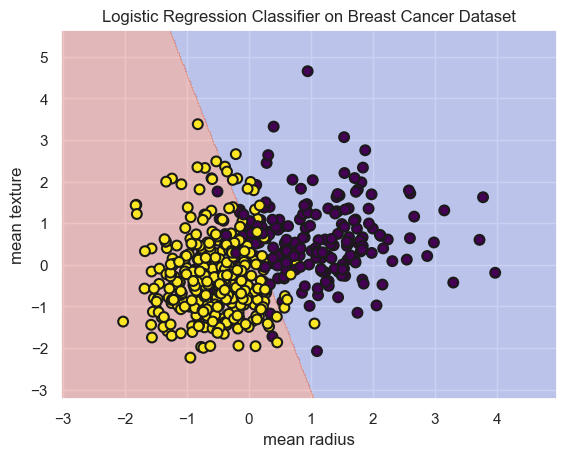

In [2]:
# Import the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using teh whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = LogisticRegression() # Create our prediction model object
# See below an example of some of the key settings
#model = LogisticRegression(penalty='l1', solver = 'liblinear', C=0.01, random_state=40)
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# It is almost always expected that you scale your data as Logistic regression is regularised
scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our logistic regression model - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .02  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Logistic Regression Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

##1.2 Support Vector Machines

Support Vector Machines are another very popular machine learning method (which can be used for regression and classification). The mathematics behind them are quite complicated and different to what we have been looking at in our linear models - using objects called 'kernels' to draw the line that best separates the classes, rather than regressing on the probability like our Logistic Regression (as such, we don't generally get a probability estimate from the SVM).

There are a few key settings you should consider for SVMs:
- `C` - The inverse Regularisation Weight (there are no options of the type of regularisation for SVM).
- `kernel` - the type of kernel the SVM model uses to fit the lines
  - `linear` - Draws a straight line
  - `poly` - Same as manually fitting polynomial features and using the linear kernel (though doing it this manual way would be computationally slower).
    - `degree` - Choose maximum polynomial degree
  - `rbf` - Uses Kernel trick to measure similarity between data points in infinite dimensions and classify based on this.
  - `sigmoid` - Creates a complex sigmoid shaped irregular boundary. Only generally useful for very specific datasets as is often does not generalise well.
- `random_state` - Allows you to recreate the same solution by generating the same quasi-random case.

**Task**: try changing some of these settings/hyperparameters in the case below to see if you can understand the impact they are having on the results.

There are some other settings/hyperparameters you could experiment with that you can find in the sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).



Accuracy: 90.69%


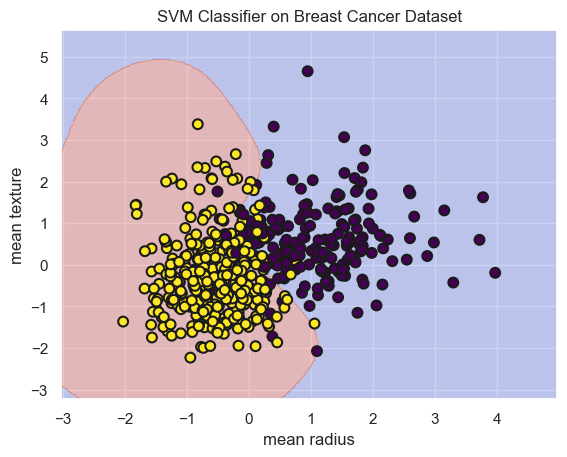

In [3]:
# Import the Support Vector Machine Classification Model
from sklearn.svm import SVC
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using teh whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = SVC() # Create our prediction model object
# See below an example of some of the key settings
#model = SVC(C=1,kernel='rbf',random_state=40)
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# It is almost always expected that you scale your data as SVM is regularised
scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our SVM - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .02  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'SVM Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

##1.3 Naive Bayes

Naive Bayes is an interesting case - it is purely probabilistic and doesn't really have any hyperparameters to tune. It's non-parametric so it doesn't case about feature scaling. One of it's key assumptions is that all features are independent (statistically), which is often not the case. Regardless, Naive Bayes is often surprisingly good at getting classification right (though its prediction of the probability should not be taken too seriously).

It is quite unlikely that naive Bayes will be your 'best' model in almost any case, but it is very quick and easy to fit and can act as a good baseline model to compare against. And sometimes it may be good enough for what you are trying to do!

You can read the sklearn [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) if you are interested in learning more about how Naive Bayes work (and there are other types you can experiment with).



Accuracy: 88.58%


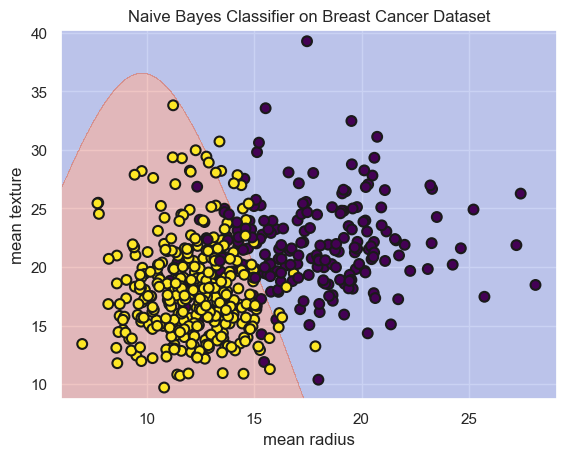

In [4]:
# Import the Naive Bayes Classification Model
from sklearn.naive_bayes import GaussianNB
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using the whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = GaussianNB() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# For Naive Bayes, this is a case where feature scaling doesn't matter!
#scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
#X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our Naive Bayes - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .02  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Naive Bayes Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

##1.4 k-Nearest Neighbours

You should already be somewhat familiar with the concept of Knn for regression - and the principles are exactly the same for classification (in fact I would say they are even more intuitive). Using the training date, the Knn classifier can check what the nearest neighbours are for each point needing to be predicted, whichever class contains the most neighbours will be the predicted class.

While there are some other options you can read about in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), the key hyperparameter of interest is the `n_neighbors`.

**Task**: try experimenting with the `n_neighbors` to see how it impacts the prediction (but remember that we are not evaluating this data properly using a test dataset!)

Accuracy: 93.32%


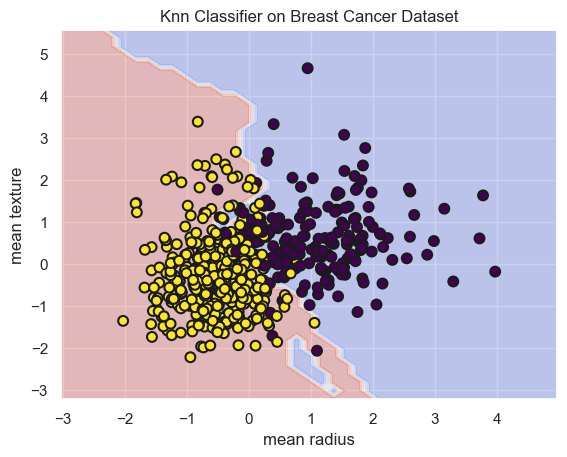

In [5]:
# Import the Knn Classification Model
from sklearn.neighbors import KNeighborsClassifier
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using the whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = KNeighborsClassifier(n_neighbors=3) # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# You probably still want to scale your features for best behaviour.
scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our Knn - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .2  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Knn Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

##1.5 Decision Tree

Decision Trees are a powerful non-parametric method that you should have encountered already for regression problems. This looks at your variables and asks a series of yes/no questions which it uses to split into a 'tree' of conditions and target predictions. Being non-parametric, the model does not care about feature scaling.

Decision trees do have a lot of variables that can (and should) be experimented with to get a model that is picking up realistic behaviour in the data:

*   `max_depth` which dictates how many levels the tree can have (where a 'deeper' tree can include more complexity as more yes/no questions are asked at each level).
*   `min_samples_split` How many samples need to exist at a node to split the data with a further yes/no question
*   `min_samples_leaf` How many samples need to exist on each branch after a split for a split to be considered.

You can find more information about these variables (and more) in the sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

**Task**: Experiment with these parameters and see what it does to your prediction. Again, remember that our pipeline here is not performing a robust evaluation and that decision trees can be quite prone to overfitting!


Accuracy: 100.00%


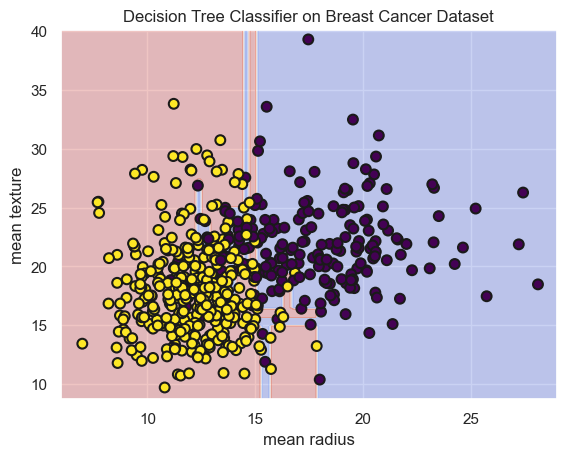

In [6]:
# Import the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using the whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = DecisionTreeClassifier() # Create our prediction model object
#model = DecisionTreeClassifier(max_depth = 3, min_samples_split = 5, min_samples_leaf = 5)
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# For Decision Trees, this is a case where feature scaling doesn't matter!
#scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
#X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our Decision Tree - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .2  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Decision Tree Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

##1.6 Random Forests

Random forests are what are known as an 'ensemble model', meaning that they are the result of fitting multiple models (in this case Decision Tree models) on subsamples of the data, with the results from all of these runs being averaged to get the best model overall and try to tackle overfitting (though random forests are still very prone to overfitting). Being non-parametric, the model does not care about feature scaling.

You can essentially think of this as an advanced form of decision tree - they use all of the same parameters outlined above, with the addition of `n_estimators`, which controls how many Decision Tree Models are created and combined for the final random forest model. As the name implies, these models are made using random samples, so for replicating your tests you should also generally set a `random_state`.

One downside of random forests are that they are 'black box' models that are not really interpretable, whereas arguably the biggest benefit of decision trees are that they are very easy to interpret and understand why they have made a choice to classify one way or the other.

Read more about Random forests in the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) documentation.

**Task**: Briefly experiment with the hyperparameters to see if you can understand how this is impacting the results.



Accuracy: 100.00%


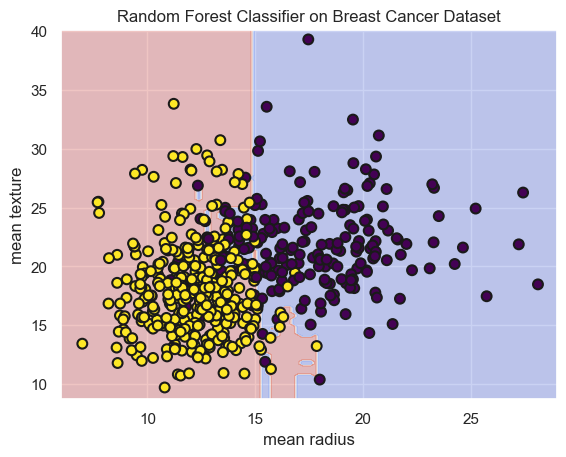

In [7]:
# Import the Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
################
# Load Data
################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
# Convert the data to `np.array`
# Note we are using the whole dataset - not a robust pipeline!
X = np.array(X_pd[['mean radius', 'mean texture']]) # just select two features
y = np.array(y_pd)

################
# Initialisation
################
model = RandomForestClassifier() # Create our prediction model object
#model = RandomForestClassifier(n_estimators=50, max_depth = 3, min_samples_split = 5, min_samples_leaf = 5, random_state = 0)
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

# For Random Forest, this is a case where feature scaling doesn't matter!
#scaler.fit(X) # Fit the standardisation object on the polynomial feature matrix
#X = scaler.transform(X) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X, y) # fit our Random Forest - 'train' the model

############
# Evaluation
############
# Evaluate performance of the training data
y_pred = model.predict(X) # Use our fitted model to make a prediction

# Calculate accuracy - note this can often be a naive classification accuracy criterion!
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundary
h = .2  # step size in the mesh
# boundaries for the grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Create mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Use model to plot the decision boundary for all points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
# Plot observed points and add text
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title(f'Random Forest Classifier on Breast Cancer Dataset')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

# 2. Classification implementation

In this section, I want to provide you with some more realistic examples of how we would aim to fit a classification model in practice, with a robust evaluation and model selection pipeline.

## 2.1 Full ML pipeline (Classification)

Here is a repeat of the ML pipeline that was presented in the previous weeks lecture - as said, the general pipeline for fitting a supervised learning ML model is essentially the same whether you are using Regression or classification, so in the pipeline I am just highlighting in red the few differences you have to consider for classification models - as you can see these are quite minimal!

General pipeline:
- Data loading
  - Ensure you perform and Exploratory Data Analysis (EDA) and clean your data before going any further when dealing with real data.
  - Convert your data into arrays that your ML model can interface with.
  - Split your data into the Train:Validation:Test sets.
- Initialization
  - Initialize the preprocessor(s) and the <font color='red'>**machine learning model objects** (You will have a different selection of models to consider during classification - see above)</font>.
- Model Selection
  - Identify the different solutions you want to try: this could involve different model types (e.g. Linear Regression, Lasso, Ridge, Decision tree, Neural Network, etc), preprocessing methods, feature selection/engineering and hyperparameter selection.
  - Training (do this for **all** models and hyperparameters)
    - **Fit the preprocessor(s)** to the raw training feature matrix.
    - **Transform (Preprocess)** the raw training feature matrix into the pre-processed training feature matrix.
    - **Fit (Train) the prediction model** using the data pair of the pre-processed training feature matrix and target column vector.
    - Recording the performance of the prediction on training data is often also helpful for identifying overfitting.

  - Validation (for **all** models and hyperparameters)
    - **Transform (Preprocess)** the raw validation feature matrix into the pre-processed validation feature matrix using **the preprocessor(s)** (**Do NOT fit any preprocessor to the validation feature matrix**).
    - **Predict** using the pre-processed validation feature matrix to get a predicted target column.
    - <font color='red'>**Evaluate** the prediction performance on the validation data by Accuracy Metrics / Confusion Matrix</font>

  - Continue training and validation until you have a model (or selection of models) you feel are potentially good enough to offer a robust solution to the provided prediction problem.

- Test (for the model and hyperparameters selected by the validation process)
  - **Transform (Preprocess)** the raw test feature matrix into the pre-processed test feature matrix by **the preprocessor(s)** (**Do NOT fit any preprocessor to the test feature matrix**).
  - **Predict** on the pre-processed test feature matrix to get a predicted target column.
  - <font color='red'>**Evaluate** the prediction performance on the test data by Accuracy Metrics / Confusion Matrix</font>

If after the test step your model is not providing good enough solutions on the test data, then you will have to go back to rethink how you can create a more robust solution less prone to overfitting.

##2.2 Binary Classification Example


Classification can be thought of as coming in two types - binary and multi-class. While very similar in how we approach them (and most models can happily deal with both without changing and variables). However, there are still enough different considerations that it is worth considering them separately.

I'm going to start with the slightly simpler case of binary classification, for which we'll be using another `sklearn` dataset about breast cancer.

In [8]:
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)
Xy_df = pd.concat([X_pd, y_pd], axis=1)

display(Xy_df)

# Convert the data to `np.array`
# We're just going to use two features for now.
X_raw = np.array(X_pd[['mean radius', 'mean texture']])
# Note that in the dataset 0 = Malignant and 1 = Benign, but we're going to switch that around going forward
# so that the 'positive' class Malignant = 1
y = np.array(1.0-y_pd)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


We want to robustly split our data into three sets for classification as well. Note that really we always want to shuffle our classification data for tabular problems like this.

In [9]:
# Split the data into non-test/test data
# While we have 20640 pairs of a feature and target, we use 20% only for the testing, not so we hold back the other 80% for training and validation
# Generally we always want to shuffle data for classification.
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
# We use 25% of the remaining non-test data only for the validation set, leaving the rest for training
# In the end, the splitting ratio will be 6:2:2 for the training, validation, and test data.
# Generally we always want to shuffle data for classification.
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)

We can see that initialisation, training and validation follow the same steps. Note that the model we are initialising here is a `LogisticRegression` model, though for now we are just using the default values.

In [10]:
################
# Initialisation
################
model = LogisticRegression() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

scaler.fit(X_train_raw) # Fit the standardisation object on the polynomial feature matrix
X_train = scaler.transform(X_train_raw) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X_train, y_train) # fit our logistic regression model - 'train' the model

############
# Validation
############

# Preprocess validation dataset using preprocessor objects for on the training data
# Do NOT refit the preprocessors
X_valid = scaler.transform(X_valid_raw) # Standardise the validation data

# We select the best hyperparameters based on the performance of our model on the validation dataset
y_pred_valid = model.predict(X_valid) # Use our fitted logistic regression model to make a prediction based on teh validation dataset

When we only have two features, we can visualise the prediction by plotting the decision boundary (which says what category the model predicts fo every possible point in an area), and by plotting the points from each class over this we can see where the model is failing.

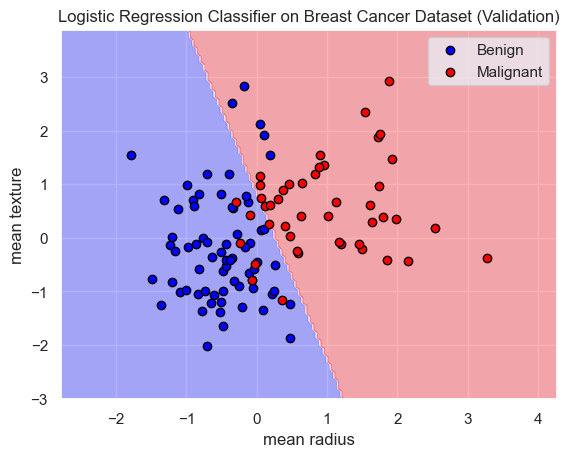

In [11]:
# Plot outputs
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_valid[:, 0].min() - 1, X_valid[:, 0].max() + 1
y_min, y_max = X_valid[:, 1].min() - 1, X_valid[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a scatter plot of the data points

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')
X_neg = X_valid[y_valid==0, :]
X_pos = X_valid[y_valid==1, :]
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', edgecolors='black', label='Benign')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', edgecolors='black', label='Malignant')


plt.xlabel('mean radius')
plt.ylabel('mean texture')

# Show the plot
plt.title(f'Logistic Regression Classifier on Breast Cancer Dataset (Validation)')
plt.legend()
plt.show()

### Classification accuracy metrics
One we have our the model fit on the validation data, we can explore various classification accuracy metrics to see how good our model is. While there is no harm in checking all of these, there is generally one metric in particular you care the most about maximising, which is generally based both on your problem (for example we generally care more about recall if a false negative is really bad - e.g. missing if someone has cancer) or the distribution of your data (if your data is well balanced then the accuracy may be a good metric).

Here are some of the common classification metrics:
- **Accuracy** defined by
$$
\mathrm{Acc} := \frac{\#\{i|\hat{y}^{(i)} \ne y^{(i)}\}}{m},
$$
calculated by `sklearn.metrics.accuracy_score`.

- **Precision** for category $y$ defined by
$$
\mathrm{Pre}_{y} := \frac{\mathrm{TP}_{y}}{\mathrm{TP}_{y} + \mathrm{FP}_{y}},
$$
calculated by `sklearn.metrics.precision_score`.

- **Recall** for category $y$ defined by
$$
\mathrm{Rec}_{y} := \frac{\mathrm{TP}_{y}}{\mathrm{TP}_{y} + \mathrm{FN}_{y}},
$$
calculated by `sklearn.metrics.recall_score`.

- **F1 score** for category $y$ defined by
$$
\mathrm{F1}_{y} := \frac{1}{\frac{1}{\mathrm{Pre}_{y}} + \frac{1}{\mathrm{Rec}_{y}}},
$$
calculated by `sklearn.metrics.f1_score`  with `average='binary'` (default).

Advanced:

- **Balanced accuracy** defined by
$$
\mathrm{BAcc} := \frac{1}{\#\mathcal{Y}} \sum_{y \in \mathcal{Y}} \mathrm{Rec}_{y},
$$
calculated by `sklearn.metrics.balanced_accuracy_score`.

- **Macro-averaged F1 score** defined by
$$
\mathrm{MacroF1} := \frac{1}{\#\mathcal{Y}} \sum_{y \in \mathcal{Y}} \mathrm{F1}_{y},
$$
calculated by `sklearn.metrics.f1_score` with `average='macro'`.

- **Weighted-averaged F1 score** defined by
$$
\mathrm{WeightF1} := \sum_{y \in \mathcal{Y}} \frac{m_y}{m} \mathrm{F1}_{y},
$$
calculated by `sklearn.metrics.f1_score` with `average='macro'`.

Here, $\mathcal{Y}$ is the set of possible target values, $\#$ indicates the number of elements in a set, $m$ is the number of data points, $m_{y} := \#\{i|y^{(i)} = y.\}$ is the number of data points whose actual target is $y$. The true positives $\mathrm{TP}_{y}$, false positives $\mathrm{FP}_{y}$, false negatives $\mathrm{FN}_{y}$, and "true" negatives $\mathrm{TN}_{y}$ are defined by
$$
\mathrm{TP}_{y} := \#\{i|y^{(i)} = y \textrm{, and } \hat{y}^{(i)} = y.\},
$$
$$
\mathrm{FP}_{y} := \#\{i|y^{(i)} \ne y \textrm{, and } \hat{y}^{(i)} = y.\},
$$
$$
\mathrm{FN}_{y} := \#\{i|y^{(i)} = y \textrm{, and } \hat{y}^{(i)} \ne y.\},
$$
$$
\mathrm{TN}_{y} := \#\{i|y^{(i)} \ne y \textrm{, and } \hat{y}^{(i)} \ne y.\}.
$$

Also, sklearn has various functions for plotting the confusion matrix and classification reports, which are good for allowing you to evaluate your model at a glance.

Accuracy: 0.8947
Precision: 0.8837
Recall: 0.8444
F1 Score: 0.8636
Balanced Accuracy: 0.8860
Macro averaged F1 Score: 0.8890
Weighted averaged F1 Score: 0.8943
Confusion matrix: 
 [[0.56140351 0.04385965]
 [0.06140351 0.33333333]]
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91        69
         1.0       0.88      0.84      0.86        45

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



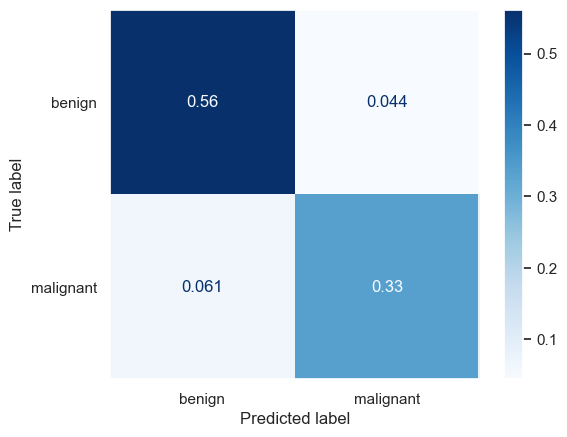

In [12]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_valid, y_pred_valid)))
print('Precision: {:.4f}'.format(precision_score(y_valid, y_pred_valid)))
print('Recall: {:.4f}'.format(recall_score(y_valid, y_pred_valid)))
print('F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_valid, y_pred_valid)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_valid, y_pred_valid, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_valid, y_pred_valid))


Finally, once we've happy that we've got a good model according to the validation data, we can go ahead with the final evaluation on the test data.

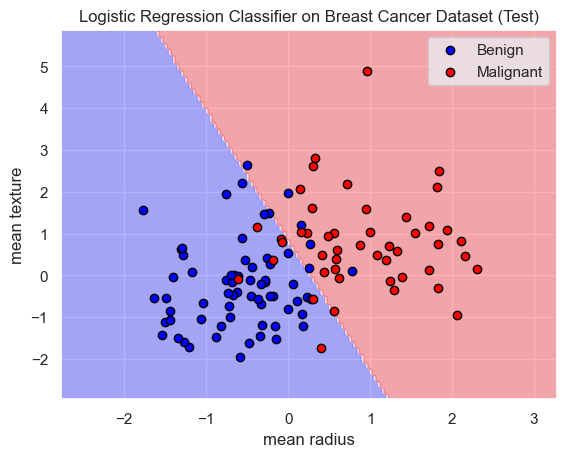

Accuracy: 0.8860
Confusion matrix: 
 [[0.53508772 0.05263158]
 [0.06140351 0.35087719]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90        67
         1.0       0.87      0.85      0.86        47

    accuracy                           0.89       114
   macro avg       0.88      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



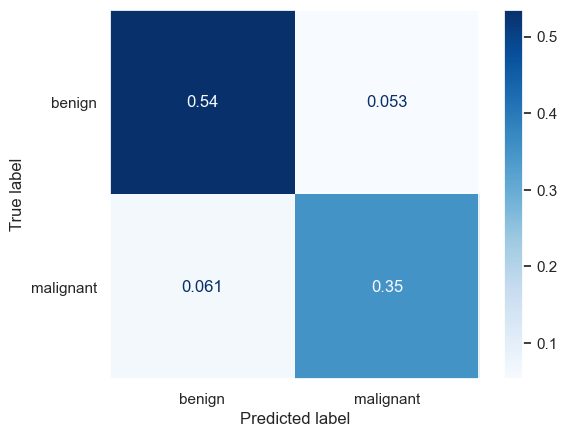

In [13]:
############
# Test
############

# Preprocess Test dataset using preprocessor objects for on the training data
# Do NOT refit the preprocessors
X_test = scaler.transform(X_test_raw) # Standardise the validation data

# We select the best hyperparameters based on the performance of our model on the validation dataset
y_pred_test = model.predict(X_test) # Use our fitted linear regression model to make a prediction based on teh validation dataset

# Plot outputs
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')
X_neg = X_test[y_test==0, :]
X_pos = X_test[y_test==1, :]
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', edgecolors='black', label='Benign')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', edgecolors='black', label='Malignant')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title(f'Logistic Regression Classifier on Breast Cancer Dataset (Test)')
plt.legend()
plt.show()

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_pred_test))


### Note on visualising higher order multivariable classification models

In the solutions so far I've been including plots of the class points over the decision boundary, which I find to be a nice way of visualising how the classification model is drawing the lines to make its decisions. See an example of this in the code cell below - the background colour represents the decision boundaries drawn by the classifier, while the labelled points show what class a data point belongs to. We can visually see that our model does a pretty good job, but we have some crossover of points near the boundary.

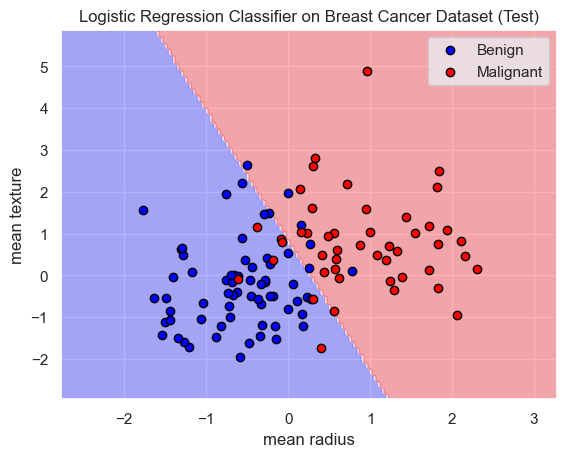

In [14]:
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'bwr')
X_neg = X_test[y_test==0, :]
X_pos = X_test[y_test==1, :]
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='blue', edgecolors='black', label='Benign')
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='red', edgecolors='black', label='Malignant')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title(f'Logistic Regression Classifier on Breast Cancer Dataset (Test)')
plt.legend()
plt.show()

But this only works because we are only using two features, we would be unable to draw this decision boundary in more than two dimensions (well, this isn't strictly true, with a 3D plot we could draw the decision surface of 3 features, but we still would then be unable to visualise the decision shape if we had any more features). While there is a similar problem in regression, at least we can get some information from plotting the predicted vs the observed values in a 2D plot (even if we are missing some information). For classification though, without the decision boundary it is very hard to intuit how well your model is doing visually.

As such, for most classification models with more features I would just be expecting to see the accuracy metrics/confusion matrix.

##2.3 Multi-class classification Example

In this section I am going to give you an example of how to fit a multi-class classification model, using the 'Iris' dataset on `sklearn`.

As most things are the same I'm just going to be highlighting how a multi-class problem requires some different considerations.

In [15]:
# Load the house price dataset
X_pd, y_pd = sklearn.datasets.load_iris(return_X_y=True, as_frame=True)
Xy_df = pd.concat([X_pd, y_pd], axis=1)

display(Xy_df)

# Convert the data to `np.array`
X_raw = np.array(X_pd[['sepal length (cm)', 'sepal width (cm)']])
y = np.array(y_pd)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Likewise, splitting, preprocessing and fitting the model is the same.

In [16]:
# Split the data into non-test/test data
# While we have 20640 pairs of a feature and target, we use 20% only for the testing, not so we hold back the other 80% for training and validation
# Generally we always want to shuffle data for classification.
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=0.20, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
# We use 25% of the remaining non-test data only for the validation set, leaving the rest for training
# In the end, the splitting ratio will be 6:2:2 for the training, validation, and test data.
# Generally we always want to shuffle data for classification.
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.25, shuffle=True, random_state=0)

################
# Initialisation
################
model = LogisticRegression() # Create our prediction model object
scaler = StandardScaler() # Here is our standardisation object

##########
# Training
##########

scaler.fit(X_train_raw) # Fit the standardisation object on the polynomial feature matrix
X_train = scaler.transform(X_train_raw) # Standardise the feature matrix to get our 'final' training data feature matrix

model.fit(X_train, y_train) # fit our linear regression model - 'train' the model

############
# Validation
############

# Preprocess validation dataset using preprocessor objects for on the training data
# Do NOT refit the preprocessors
X_valid = scaler.transform(X_valid_raw) # Standardise the validation data

# We select the best hyperparameters based on the performance of our model on the validation dataset
y_pred_valid = model.predict(X_valid) # Use our fitted linear regression model to make a prediction based on teh validation dataset

We can see below how our confusion matrix has been changed - as you would expect, there are now three groups to correspond to the three classes. This doesn't really change the interpretation, as we still have correct and incorrect predictions.

The only thing to get your head around is that we don't really have a 'positive' class any more, so any notion of false positives/negatives applies only *on a the level of the class we are currently looking at* rather than a statement for the entire model prediction.

Likewise, our classification report has a row for each class now, so again we have to consider the classes individually from these metrics.

Accuracy: 0.8333
Confusion matrix: 
 [[0.33333333 0.         0.        ]
 [0.         0.16666667 0.1       ]
 [0.         0.06666667 0.33333333]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.71      0.62      0.67         8
           2       0.77      0.83      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30



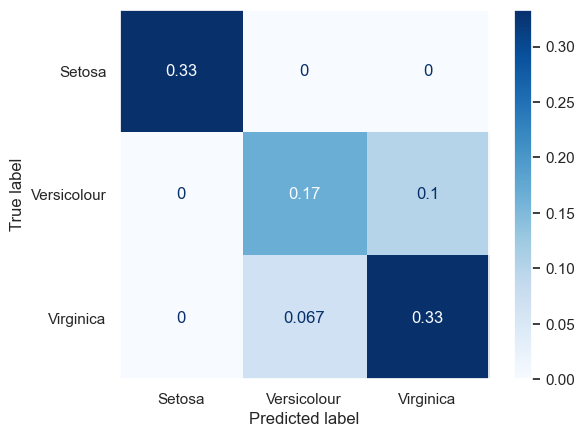

In [17]:
# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_valid, y_pred_valid)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_valid, y_pred_valid, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Setosa', 'Versicolour', 'Virginica']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_valid, y_pred_valid))


Finally we come to testing, and again things remain the same - but now we can see our decision boundary has three sections.

The main thing I want you to note is that we now HAVE to average some of our classification metrics (types of `accuracy` are unaffected). In binary classification we can have a 'positive' class that the model considers for the precision/recall/f1, but as mentioned above we don't have this option for multi class problems.

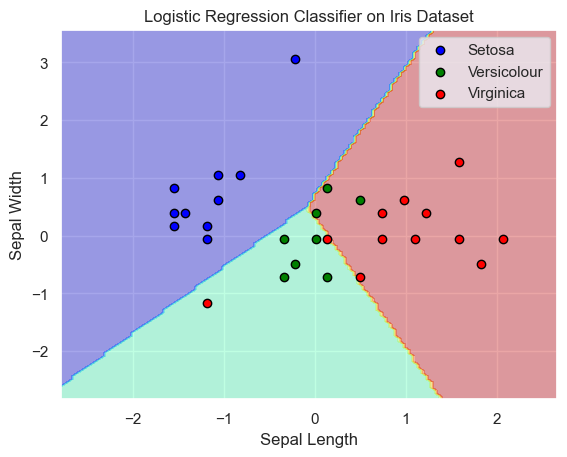

Accuracy: 0.7333
Precision: 0.7008
Recall: 0.7051
Balanced Accuracy: 0.7051
Macro averaged F1 Score: 0.6984
Weighted averaged F1 Score: 0.7413
Confusion matrix: 
 [[0.36666667 0.         0.        ]
 [0.         0.26666667 0.16666667]
 [0.         0.1        0.1       ]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



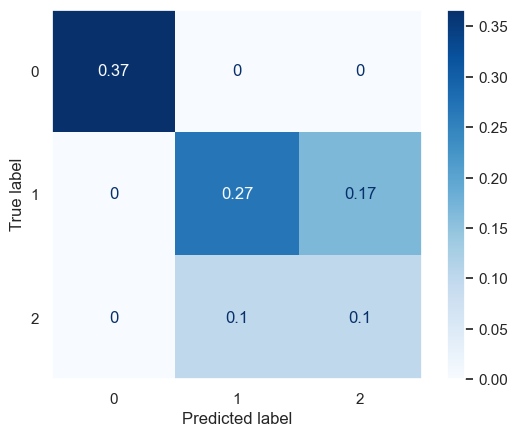

In [18]:
############
# Test
############

# Preprocess Test dataset using preprocessor objects for on the training data
# Do NOT refit the preprocessors
X_test = scaler.transform(X_test_raw) # Standardise the validation data

# We select the best hyperparameters based on the performance of our model on the validation dataset
y_pred_test = model.predict(X_test) # Use our fitted linear regression model to make a prediction based on teh validation dataset

# Create a meshgrid to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict the class labels for the points in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.35, cmap = 'jet')
# Create a scatter plot of the data points
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
X_0 = X_valid[y_valid==0, :]
X_1 = X_valid[y_valid==1, :]
X_2 = X_valid[y_valid==2, :]
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', edgecolors='black', label='Setosa')
plt.scatter(X_1[:, 0], X_1[:, 1], color='green', edgecolors='black', label='Versicolour')
plt.scatter(X_2[:, 0], X_2[:, 1], color='red', edgecolors='black', label='Virginica')

# Show the plot
plt.title(f'Logistic Regression Classifier on Iris Dataset')
plt.legend()
plt.show()

# The accuracy score: 1 for perfect prediction
print('Accuracy: {:.4f}'.format(sklearn.metrics.accuracy_score(y_test, y_pred_test)))
######## Note we have to average some of our metrics now!
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test, average='weighted')))
#######################################################
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(sklearn.metrics.classification_report(y_test, y_pred_test))


## 2.4 Hyperparameter selection

As I keep stressing, there really isn't a difference in the model selection process between classification and regression - other than the models you can use and the evaluation metrics.

As such, all the techniques and examples I have already shown you relating to hyperparameter selection and model selection still hold true for these questions. As such, you should still split your data into thtee sets (or use cross validation) and you can use any combination of manual experimentation, hand coded loops and grid searches to help you optimise your hyperparameters and choose the best model.

But just to give you a directly comparable example, below I am providing an example of how we could optimise our inverse regression weight for a logistic regression model. If you still don't feel confident with the principles of model selection, do make sure you read through this code (and comments) carefully to make sure you understand what is being done, do ask your tutor if you have any doubts or questions.

C: 1e-10, f1 score: 0.0.
C: 1e-09, f1 score: 0.0.
C: 1e-08, f1 score: 0.0.
C: 1e-07, f1 score: 0.0.
C: 1e-06, f1 score: 0.0.
C: 1e-05, f1 score: 0.0.
C: 0.0001, f1 score: 0.0.
C: 0.001, f1 score: 0.42105263157894735.
C: 0.01, f1 score: 0.8461538461538461.
C: 0.1, f1 score: 0.8275862068965517.
C: 1.0, f1 score: 0.8.
C: 10.0, f1 score: 0.8275862068965517.
C: 100.0, f1 score: 0.8.
C: 1000.0, f1 score: 0.8.
C: 10000.0, f1 score: 0.8.
C: 100000.0, f1 score: 0.8.
C: 1000000.0, f1 score: 0.8.
C: 10000000.0, f1 score: 0.8.
C: 100000000.0, f1 score: 0.8.
C: 1000000000.0, f1 score: 0.8.


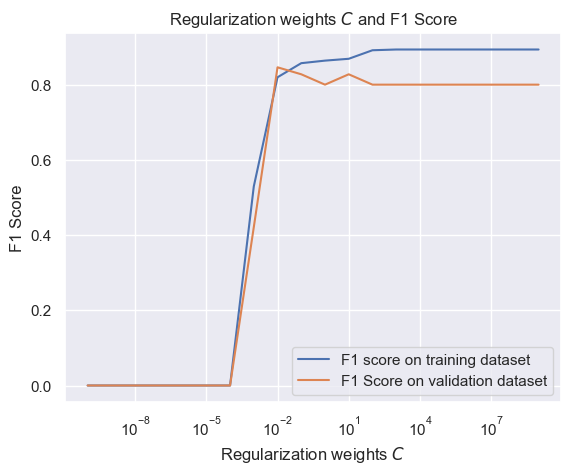


The best C: 0.01

Accuracy: 0.8772
Precision: 0.9412
Recall: 0.7273
F1 Score: 0.8205
Balanced Accuracy: 0.8494
Macro averaged F1 Score: 0.8205
Weighted averaged F1 Score: 0.8205

Confusion matrix: 
 [[0.59649123 0.01754386]
 [0.10526316 0.28070175]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91        35
         1.0       0.94      0.73      0.82        22

    accuracy                           0.88        57
   macro avg       0.90      0.85      0.86        57
weighted avg       0.89      0.88      0.87        57



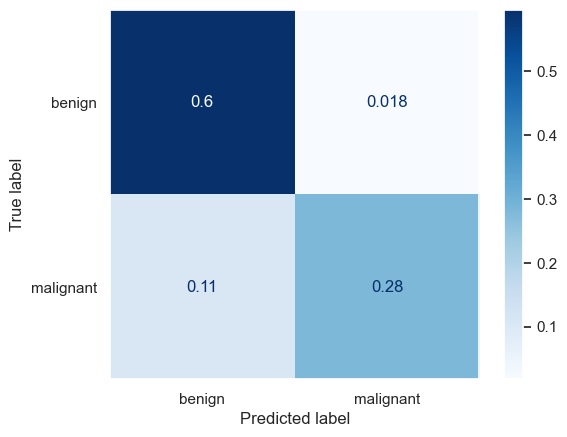

In [19]:
#####################
# Load and split data
#####################
# Load the breast cancer dataset
X_pd, y_pd = sklearn.datasets.load_breast_cancer(return_X_y=True, as_frame=True)

# Convert the data to `np.array`
# note I'm selecting 4 features here - which is more than in our previous examples.
X_raw = np.array(X_pd[['mean radius', 'mean texture', 'mean perimeter', 'mean area']])
# Note that in the dataset 0 = Malignant and 1 = Benign, but we're going to switch that around going forward
# so that the 'positive' class Malignant = 1
y = np.array(1.0-y_pd)

# Split the data
X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X_raw, y, test_size=1/10, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=1/9, shuffle=True, random_state=0)


###################################
# Initialise Model and preprocessors
###################################

C_indices = np.arange(20) # Get a list of 1-20
Cs = 10.0 ** ( C_indices-10) # Define a list of Cs by taking indices from 10 to -10
# Get the F1 score arrays
# Note that we could be monitoring any of the other metrics to choose our model.
#I have chosen f1 here as it give a balanced penalisation of accuracy and recall, but for your case you may care about maximising another metric
f1_train_array = np.full([len(Cs)], np.nan)
f1_valid_array = np.full([len(Cs)], np.nan)

#Initialise our scaler object - remember that for Logistic regression we should always scale features
scaler = StandardScaler()

#######################
# Training & validation
#######################

# preprocessing
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_valid = scaler.transform(X_valid_raw)

# Loop to test C values
for C_index, C in zip(C_indices, Cs):
  # train
  model = LogisticRegression(C=C) # fits our Logistic Regression model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  f1_train = f1_score(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  f1_valid = f1_score(y_valid, y_pred_valid)

  # Store f1s for this iteration
  f1_train_array[C_index] = f1_train
  f1_valid_array[C_index] = f1_valid
  print(f'C: {C}, f1 score: {f1_valid}.')

# Plot our graph of F1 for training and validation
plt.plot(Cs, f1_train_array, label='F1 score on training dataset')
plt.plot(Cs, f1_valid_array, label='F1 Score on validation dataset')
plt.xlabel(r'Regularization weights $C$')
plt.ylabel('F1 Score')
plt.title(r'Regularization weights $C$ and F1 Score')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing C (highest f1)
best_c_index = np.nanargmax(f1_valid_array)
best_C = Cs[best_c_index]
print(f'\nThe best C:', best_C)

######
# Test
######
model = LogisticRegression(C=best_C) # fits our Logistic Reg model with the best weight
model.fit(X_train, y_train)
# Preprocess test data
X_test = scaler.transform(X_test_raw)
# Predict test data
y_pred_test = model.predict(X_test)

##########
# Evaluate
##########

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))


##2.5 Comparison with a naive baseline

One final thing I would say for evaluating your classification model, is that a good final check that your model is behaving well is to see how it compares to what we would call a 'naive baseline'. Generally I would recommend doing this as a final check after you have evaluated the test data as a bit of a 'sanity check'.

This can be done using a simpler model (such as Naive Bayes or K-nearest neighbours), but if often done by just classifying by a very basic rule without even looking at the data. If your model does not outperform this (or is very similar) you have to consider if your model is finding any real patterns in the data.

The two most common ways I see this being done is just classifying all things as the same class (generally the majority class if there is an unbalance or the positive class), or by randomly selecting a class.

Lets try some examples of this on our breast cancer model fitted above.


Accuracy: 0.3860
Precision: 0.3860
Recall: 1.0000
F1 Score: 1.0000
Balanced Accuracy: 0.5000
Macro averaged F1 Score: 0.5570
Weighted averaged F1 Score: 0.5570

Confusion matrix: 
 [[0.         0.61403509]
 [0.         0.38596491]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        35
         1.0       0.39      1.00      0.56        22

    accuracy                           0.39        57
   macro avg       0.19      0.50      0.28        57
weighted avg       0.15      0.39      0.21        57



/Users/muhammedazhar/.miniconda3/envs/COMP1801-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammedazhar/.miniconda3/envs/COMP1801-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/muhammedazhar/.miniconda3/envs/COMP1801-ML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

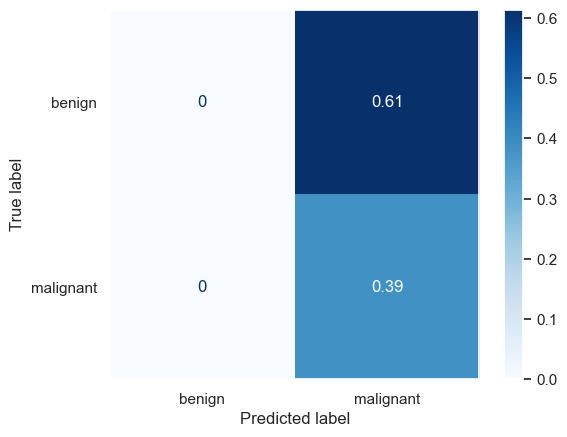

In [20]:
# Here we are just going to assume that every point is positive (malignant)
# While this does give us perfect recall, I think we agree that telling 60% of people
# incorrectly that they have cancer is not ideal!

y_pred_test = np.ones_like(y_test)

##########
# Evaluate
##########

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))


Accuracy: 0.4912
Precision: 0.3704
Recall: 0.4545
F1 Score: 1.0000
Balanced Accuracy: 0.4844
Macro averaged F1 Score: 0.4082
Weighted averaged F1 Score: 0.4082

Confusion matrix: 
 [[0.31578947 0.29824561]
 [0.21052632 0.1754386 ]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.51      0.55        35
         1.0       0.37      0.45      0.41        22

    accuracy                           0.49        57
   macro avg       0.49      0.48      0.48        57
weighted avg       0.51      0.49      0.50        57



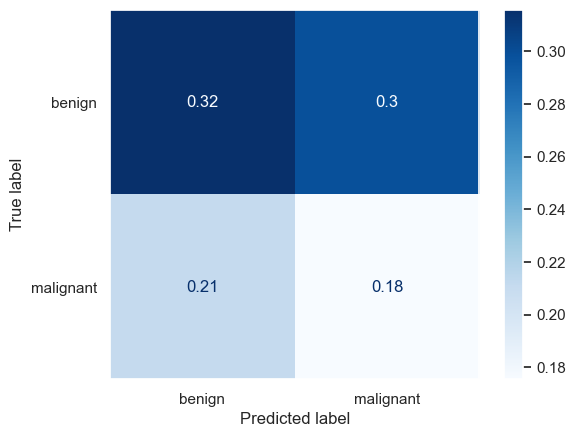

In [21]:
# Here I'm generating 0 or 1 randomly for each observation
# Note I've set the numpy random seed so this is replicable
# The performance of this is pretty rubbish - which is good!
np.random.seed(1234)
y_pred_test = np.random.randint(2, size=len(y_test))

##########
# Evaluate
##########

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['benign', 'malignant']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))

Based on both of these, I thing that we can be confident that our model is performing significantly better than a naive baseline - which is what we want to see!

# 3. Exercises

We've reached the stage now where for the most part in the exercises, rather than having a single task I want you to experiment with your models to see how good an accuracy you can get for the problem, using all of the tools I have provided you with so far. So when attempting these exercises to fit the models (and when doing your coursework!) make sure you consider the following (non exhaustive) list of aspects to consider:
- Data splitting (consider cross validation)
- Preprocessing steps
- Features used (will you remove any manually, or leave that all down to regularisation?)
- Testing different model types
- Hyperparameter tuning (Manual, loops, grid search)
- Evaluating your final model **only** on the test data!
- Compare classification with a Naive baseline

If you complete everything, you might want to try the [UCI Machine learning repository](https://archive.ics.uci.edu/) to get some new datasets to practice with (for both classification and regression).

## 3.1 Exercise 1 - Breast Cancer Dataset

As the primary dataset we've been working with so far, I would like for you to take everything we've been doing above to see how good a model you can fit on the breast cancer dataset.

Guidance:
- I would like you to try fitting at least one other type of classification model other than Logistic regression.
- Try examining multiple hyperparameters.
- Try including all of the feature data in the model.
- Consider the dataset and what metric you care the most about optimising
- This is quite an 'easy' classification problem, so see how good a solution you can get with a robust 60:20:20 data splitting!
- Note: Logistic regression can still use polynomial features

The best model you get will depend on what metric you decide to maximise. I chose the recall (do you know why?) and using a 60:20:20 data split I was able to get a recall of $94\%$ on the test data. Can you beat me?

In [22]:
##############################################################
# Your code here
##############################################################

##3.2 Exercise 2 - Iris Dataset

Please take everything we've been doing and see how good a model you can fit on the multi-class Iris dataset.

Guidance:
- I would like you to try fitting at least one other type of classification model other than Logistic regression.
- Try examining multiple hyperparameters.
- Try including all of the data in the model.
- Note: Logistic regression can still use polynomial features

In [23]:
##############################################################
# Your code here
##############################################################

##3.3 Exercise 3 - Nonlinear Data

Here I have used the `make_moons` command to create a dataset that has a very nonlinear relationship between the two features (but has clear groups visually).

Can you fit a model that classifies this nonlinear data well?

Extra: Can you find a way to make Logistic regression classify this dataset?

Text(0, 0.5, 'Feature 2')

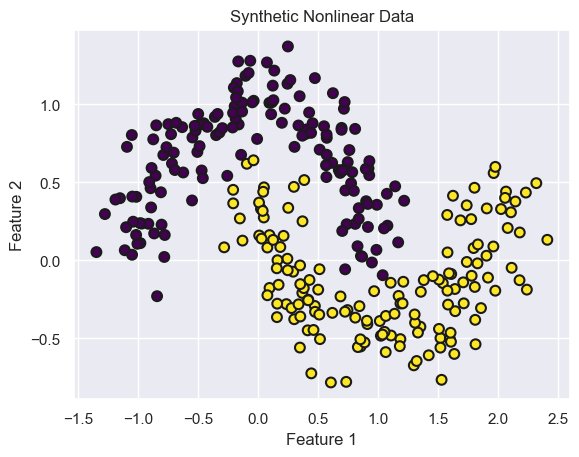

In [24]:
from sklearn.datasets import make_moons

# Create a synthetic dataset with two interleaving half circles
X, y = make_moons(n_samples=300, noise=0.15, random_state=42)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50, linewidth=1.5)
plt.title('Synthetic Nonlinear Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [25]:
##############################################################
# Your code here
##############################################################

##3.4 Exercise 4 - Wine Dataset

This is another multi class classification dataset. See how accurate a solution you can get to this previously unseen dataset.

Guidance:
- I would like you to try fitting at least one other type of classification model other than Logistic regression.
- Try examining multiple hyperparameters.
- Try including all of the data in the model.

In [26]:
##############################################################
# Your code here
##############################################################